<table class="table table-bordered">
    <tr>
        <th style="text-align:center; vertical-align: middle; width:50%"><img src='https://www.np.edu.sg/images/default-source/default-album/img-logo.png'"></th>
        <th style="text-align:center;"><h1>Deep Learning</h1><h2>Problem 1 - Food Classification Model (Individual)</h2><h3>AY2025 Semester</h3></th>
    </tr>
</table>

In [ ]:
import os
import random

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications import (
    VGG16,
    Xception,
    MobileNetV2,
    EfficientNetB0,
    InceptionV3,
)
from tensorflow.keras.applications.xception import preprocess_input

from google.colab import drive
drive.mount('/content/drive')

np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)


Mounted at /content/drive


>[Overview](#scrollTo=ntstyI1UfKVX)

>[Step 1: Data Loading](#scrollTo=82k63es8fIIx)

>[Step 2:  Develop the Image Classification Models](#scrollTo=8_Wkky6BfIIy)

>>[Testing of Pre-Trained CNN Models](#scrollTo=vqefEJgtg-yu)

>>>[InceptionV3](#scrollTo=W2Mx1FMfU1Ph)

>>>[Xception](#scrollTo=Vv9f7fsoU5k8)

>>>[MobileNetV2](#scrollTo=V418uEdvU7gb)

>>>[VGG16](#scrollTo=p6JO7PyeU9TB)

>>>[EfficientNetB0](#scrollTo=DlEM7ZIjU_HP)

>>>[Choice of Pre-Trained CNN model](#scrollTo=VYmU4MK9qGMW)

>>[Optimizers](#scrollTo=PeO0YTSrhYe3)

>>[Baseline Model](#scrollTo=MKbJLeQTL8tg)

>>[Data Augmentation](#scrollTo=CEp-BAIvlYAU)

>>[Model 1 (Added dense layer, regularization and dropout)](#scrollTo=wWuZmy-6obK4)

>>[Model 2 (Reduce number of dense layers)](#scrollTo=JhEgBzWtqKFj)

>>[Model 3 (Added BatchNormalization)](#scrollTo=XTNzNnpIqLnm)

>>[Model 4 (Fine-tuning [40 layers])](#scrollTo=Xf423fqMra52)

>>[Model 5 (Fine-tuning [30 layers])](#scrollTo=hN7iGzzzrTBj)

>>[Model 6 (Fine-tuning [60 layers])](#scrollTo=ANo1aQEcrPyG)

>>[Model 7 (Increase dropout)[30 layers]](#scrollTo=8SZaUqldrtQb)

>>[Model 8 (Added a dense layer)](#scrollTo=d8jg-Ov6rvcx)

>>[Model 9 (Remove batchnormalisation)](#scrollTo=zVn7c6GpWmUE)

>[Step 3 – Evaluate the Developed Models using Testing Images](#scrollTo=aBTrmfU0fII1)

>>[Baseline Model](#scrollTo=l6X5pZ5jngMz)

>>[Model 1](#scrollTo=Xe4iefX2njHb)

>>[Model 2](#scrollTo=56Gz5qvdno5N)

>>[Model 3](#scrollTo=vyHnl7opnuqx)

>>[Model 4](#scrollTo=eOSCOcu5n1Kb)

>>[Model 5](#scrollTo=-RDbPn_pn3F2)

>>[Model 6](#scrollTo=ylbQUQh6n4Dd)

>>[Model 7](#scrollTo=XJjVYy8Xn5GN)

>>[Model 8](#scrollTo=4lJxwqkUn6V9)

>>[Model 9](#scrollTo=_VuvAsPAn7vK)

>>[Best Model](#scrollTo=13xb849_tJBv)

>[Step 4  – Use the best model to make prediction](#scrollTo=m04FDxrUfII6)

>>[Baby Back Ribs](#scrollTo=F3y93BEHATWq)

>>[Beef Tartare](#scrollTo=OjAFRla7AYiy)

>>[Churros](#scrollTo=p5F_UIZOAZ_t)

>>[Crab Cakes](#scrollTo=LlzH_9BPAbAf)

>>[Donuts](#scrollTo=_MtcyOfLAciq)

>>[Grilled Cheese Sandwich 1](#scrollTo=wxxqO9HIAdhQ)

>>[Grilled Cheese Sandwich 2](#scrollTo=QXWjsW0tAf4i)

>>[Lasagna](#scrollTo=KXQrMmLxAg4B)

>>[Macaroni And Cheese](#scrollTo=ZedRVQgpAh97)

>>[Seaweed Salad](#scrollTo=aWdAXV7WAkCc)

>>[Shrimp and Grits](#scrollTo=HhzV_OXxAlZr)

>>[Model Performance](#scrollTo=wLInIhP2oaFy)

>[Summary](#scrollTo=U_MRLd1NoepD)



# Overview
---



As automated dietary tracking and smart kitchen assistants become more widespread, reliable food image recognition is becoming increasingly important. Manually logging meals is very tedious and prone to errors, hence a reliable computer vision model that can identify dishes from photos would make dietary tracking and nutritional analysis more efficient. For example, it is used in calorie counting apps, self checkout systems or personalized meal planning. For this assignment, we are to create a model to resolve this problem of multiclass classification. The model is to correctly identify which of 10 food categories the image given belongs to.

We are given a balanced dataset of 10000 photos, 1000 per food category for 10 categories. This balance helps to ensure that each category that we are given contributes equally during training , ensuring there is no class-imbalance that would make it biased. Real-world food photos are likely to differ based on many factors such as lighting, serving styles, camera angles or plating arrangements. Designing and creating a model that would not be affected by these factors is crucial for reliable performance in practical and real-world applications.

Instead of building the model from scratch, we adopt a transfer learning method where we would use pre-trained convolutional neural network models (e.g VGG16, Xception). These models are already trained on large-scale image datasets and already know how to recognize and detect things like edges, textures and complex patterns. This is much more efficient and convenient since we can focus on fine-tuning for our specific problem of our 10 different food classes. We would freeze most of the pretrained network and attach a custom classification head that is trained specific to our tasks of our 10 food classes. It helps reduce training time and computational costs.

My approach closely follows a classic machine learning workflow.
My first step would be data preparation. I would organize and label my images into training, validation and test splits for better evaluation. I would also eventually apply data augmentation to simulate real-world variability and help to improve model training. It would include things like flipping images, rotating or changing the colour filters.
Secondly, to create the model, I would keep the pretrained backbone mostly frozen to reduce overfitting. I also attached a global pooling layer to condense the convolutional outputs into a single vector, which is followed by dense layers for classification.

Thirdly, I would monitor the training and validation accuracy and loss curves to detect overfitting or underfitting. Our goal is to find the right fit in between optimization and generalization hence we would have to adjust our model accordingly. For example to fine tune deeper layers or add heavier regularization and increase/decrease dropout.

Fourth, we would use the validation set to help guide what to refine and adjust and to reserve a true test set/split for a final performance reporting. This would simulate testing the model on actual real-world unseen data. We would measure the overall accuracy and examine the error accordingly.

For this model, we would aim for a high validation and test accuracy, with minimal gap between the training and validation accuracy. It should also classify a new image easily into either 1 of the 10 classes.




# Step 1: Data Loading

It is crucial to prepare raw images for training and ensure consistency and introduce variability that improves generalization.

Firstly, I had downloaded the image dataset from Kaggle, according to the instructions. I had only uploaded images for the food categories I was given to reduce storage and waiting time. I then followed the instructions of using the Image_Preprocessing file to extract my food types and split my dataset into 3 folders, train, validation and test. They each contain 10 subfolders for each food class. For each class’s images they used a stratified split where 75% are used for training, 20% for validation and 5% for testing. This preserves class balance in each subset and prevents biasness during evaluation and training.  

In [ ]:

img_size = 150
batch_size = 32
num_classes = 10

np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)


I added a random seed of 42 to ensure consistency and reproducibility, as well as defining the number of classes (10), image size (150) and batch size (32).


We also need to standardize the size of the input images as the CNN models usually expect a fixed-size. Hence we resize all images to 150x150 which offers a balance between sufficient detail and memory usage. Each pixel’s RGB are also rescaled from 0-255 to 0-1 as it helps to speed up convergence.

In [ ]:
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Paths
base_dir = '/content/drive/MyDrive/assg'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

img_size = 150
batch_size = 32
num_classes = 10

# No augmentation ,just preprocessing
common_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = common_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='sparse'
)

validation_generator = common_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='sparse'
)

test_generator = common_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)


Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


I initialize 3 different generators , one for train, one for validation and one for test. The train generator would look in each directory to find each image and resize it, apply augmentation and pack images into batches and assign an integer label based on its subfolder name. Similarly, the validation generator would look in its directory but only applies the preprocess_input function with no augmentation for consistency. The test generator is identical to the validation one but its output will be in the same order every time. These generators will help me do everything i have mentioned such as, loading, preprocessing and augmentation.



Next after creating the baseline model, to make the model more adaptable to real-world variation like different angles, different plating styles or different lighting, we applied randomized data augmentation during our training. We made use of Keras’ ImageDataGenerator to configure the augmentation transformation settings. For example, we added horizontal flips, rotations, width/height shifts , zooms and brightness changes. However, the validation and test generators only use rescaling to ensure a deterministic evaluation.

Now our data is ready for building of our model where we would train it, adjust it based on its validation accuracy and then testing it on unseen data.



# Step 2:  Develop the Image Classification Models

Before building the models, I had to consider the last-layer activation and the loss metrics. Currently our problem requires us to classify images into 1 of the 10 food categories. This would mean that the problem we are dealing with is  a multiclass, single label classification problem. Hence i have chosen to use ‘softmax’ as my last layer activation. Since I went with label encoding for convenience, I would have to use sparse categorical crossentropy. My last layer also has 10 output neurons since there are 10 classes to be predicted. There would be 10 different probabilities in the output, 1 for each class and adds up to 1.

## Testing of Pre-Trained CNN Models

Firstly, I'll try comparing the different pre-trained models with a small model, with little epochs to see which has highest val acc within shortest time.

I also wanted to try testing different pre-trained convolutional neural network models to see which is the most efficient, having the highest validation accuracy within the shortest time. I had only tested for 3 epochs for efficiency since we are just experimenting. I experimented with InceptionV3, Xception, MobileNetV2, VGG16 and EfficientNetB0.

### InceptionV3

In [ ]:
conv_base = InceptionV3(weights='imagenet',
                        include_top=False,
                        input_shape=(img_size, img_size, 3))
conv_base.trainable = False

model = models.Sequential()
model.add(conv_base)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

model.compile(
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(train_generator, epochs=3, validation_data=validation_generator)


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
235/235 ━━━━━━━━━━━━━━━━━━━━ 3693s 16s/step - accuracy: 0.2917 - loss: 2.5016 - val_accuracy: 0.6045 - val_loss: 1.1825
Epoch 2/3
235/235 ━━━━━━━━━━━━━━━━━━━━ 622s 3s/step - accuracy: 0.5413 - loss: 1.3540 - val_accuracy: 0.6315 - val_loss: 1.0649
Epoch 3/3
235/235 ━━━━━━━━━━━━━━━━━━━━ 587s 2s/step - accuracy: 0.5775 - loss: 1.2521 - val_accuracy: 0.6580 - val_loss: 0.9894


### Xception

In [ ]:
conv_base = Xception(weights='imagenet',
                        include_top=False,
                        input_shape=(img_size, img_size, 3))
conv_base.trainable = False

model = models.Sequential()
model.add(conv_base)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

model.compile(
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(train_generator, epochs=3, validation_data=validation_generator)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 3381s 14s/step - acc: 0.3506 - loss: 1.9011 - val_acc: 0.6760 - val_loss: 1.0294
Epoch 2/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 910s 4s/step - acc: 0.6028 - loss: 1.1608 - val_acc: 0.7020 - val_loss: 0.9178
Epoch 3/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 889s 4s/step - acc: 0.6675 - loss: 1.0075 - val_acc: 0.7160 - val_loss: 0.8590
Epoch 4/30
235/235 ━━━━━━━━━━━━━━━━━━━━ 894s 4s/step - acc: 0.6780 - loss: 0.9713 - val_acc: 0.7125 - val_loss: 0.8438
Epoch 5/30
 46/235 ━━━━━━━━━━━━━━━━━━━━ 10:00 3s/step - acc: 0.6937 - loss: 0.9033

KeyboardInterrupt: 

(sorry i only wanted to test for 3 epochs but accidentally ran more, hence i manually stopped it earlier)

### MobileNetV2

In [ ]:
conv_base = MobileNetV2(weights='imagenet',
                        include_top=False,
                        input_shape=(img_size, img_size, 3))
conv_base.trainable = False

model = models.Sequential()
model.add(conv_base)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

model.compile(
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(train_generator, epochs=3, validation_data=validation_generator)


/tmp/ipython-input-5-1743840903.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  conv_base = MobileNetV2(weights='imagenet',


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
235/235 ━━━━━━━━━━━━━━━━━━━━ 3402s 14s/step - accuracy: 0.2363 - loss: 2.3198 - val_accuracy: 0.6345 - val_loss: 1.2173
Epoch 2/3
235/235 ━━━━━━━━━━━━━━━━━━━━ 82s 347ms/step - accuracy: 0.5175 - loss: 1.4364 - val_accuracy: 0.6945 - val_loss: 0.9608
Epoch 3/3
235/235 ━━━━━━━━━━━━━━━━━━━━ 79s 336ms/step - accuracy: 0.5999 - loss: 1.2033 - val_accuracy: 0.7140 - val_loss: 0.8770


### VGG16

In [ ]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(img_size, img_size, 3))
conv_base.trainable = False

model = models.Sequential()
model.add(conv_base)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

model.compile(
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\nTraining VGG16...")
model.fit(train_generator, epochs=3, validation_data=validation_generator)



Training VGG16...
Epoch 1/3
235/235 ━━━━━━━━━━━━━━━━━━━━ 2326s 10s/step - accuracy: 0.1250 - loss: 2.4015 - val_accuracy: 0.4300 - val_loss: 2.0005
Epoch 2/3
235/235 ━━━━━━━━━━━━━━━━━━━━ 2359s 10s/step - accuracy: 0.3114 - loss: 2.0086 - val_accuracy: 0.5205 - val_loss: 1.7540
Epoch 3/3
235/235 ━━━━━━━━━━━━━━━━━━━━ 2352s 10s/step - accuracy: 0.4215 - loss: 1.7888 - val_accuracy: 0.5550 - val_loss: 1.5700


### EfficientNetB0

In [ ]:
conv_base = EfficientNetB0(weights='imagenet',
                           include_top=False,
                           input_shape=(img_size, img_size, 3))
conv_base.trainable = False

model = models.Sequential()
model.add(conv_base)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

model.compile(
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

print("\nTraining EfficientNetB0...")
model.fit(train_generator, epochs=3, validation_data=validation_generator)


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Training EfficientNetB0...
Epoch 1/3
235/235 ━━━━━━━━━━━━━━━━━━━━ 120s 428ms/step - accuracy: 0.1091 - loss: 2.3334 - val_accuracy: 0.1000 - val_loss: 2.3033
Epoch 2/3
235/235 ━━━━━━━━━━━━━━━━━━━━ 81s 345ms/step - accuracy: 0.0954 - loss: 2.3067 - val_accuracy: 0.1000 - val_loss: 2.3020
Epoch 3/3
235/235 ━━━━━━━━━━━━━━━━━━━━ 82s 347ms/step - accuracy: 0.1076 - loss: 2.3038 - val_accuracy: 0.1000 - val_loss: 2.3028


### Choice of Pre-Trained CNN model

After comparing the different pre-trained models, it is shown that MobileNetV2 was able to achieve a high validation accuracy within a short period of time.

In [ ]:
conv_base = MobileNetV2(weights='imagenet',
                        include_top=False,
                        input_shape=(img_size, img_size, 3))
conv_base.trainable = False

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

/tmp/ipython-input-8-3816617988.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  conv_base = MobileNetV2(weights='imagenet',


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Since it was tested that MobileNetV2 is the most efficient, I set it as my convolutional base with all layers frozen and input shape of 150,150,3. For all my models, I added early stopping for efficiency as it prevents unnecessary epochs and overfitting.

## Optimizers

I also tried to test the 2 different optimizers we were familiar with, Adam and RMSprop. So using the information that MobileNetV2 was the best performing one, I used the same simple model but changed the optimizer from RMSprop to Adam.

RMSprop with MobileNetV2

In [ ]:
conv_base = MobileNetV2(weights='imagenet',
                        include_top=False,
                        input_shape=(img_size, img_size, 3))
conv_base.trainable = False

model = models.Sequential()
model.add(conv_base)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

model.compile(
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(train_generator, epochs=3, validation_data=validation_generator)


/tmp/ipython-input-5-1743840903.py:1: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  conv_base = MobileNetV2(weights='imagenet',


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
235/235 ━━━━━━━━━━━━━━━━━━━━ 3402s 14s/step - accuracy: 0.2363 - loss: 2.3198 - val_accuracy: 0.6345 - val_loss: 1.2173
Epoch 2/3
235/235 ━━━━━━━━━━━━━━━━━━━━ 82s 347ms/step - accuracy: 0.5175 - loss: 1.4364 - val_accuracy: 0.6945 - val_loss: 0.9608
Epoch 3/3
235/235 ━━━━━━━━━━━━━━━━━━━━ 79s 336ms/step - accuracy: 0.5999 - loss: 1.2033 - val_accuracy: 0.7140 - val_loss: 0.8770


Adam with MobileNetV2

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(train_generator, epochs=3, validation_data=validation_generator)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
235/235 ━━━━━━━━━━━━━━━━━━━━ 2335s 10s/step - accuracy: 0.2490 - loss: 2.3412 - val_accuracy: 0.6370 - val_loss: 1.2118
Epoch 2/3
235/235 ━━━━━━━━━━━━━━━━━━━━ 45s 192ms/step - accuracy: 0.5578 - loss: 1.3193 - val_accuracy: 0.6875 - val_loss: 0.9637
Epoch 3/3
235/235 ━━━━━━━━━━━━━━━━━━━━ 46s 198ms/step - accuracy: 0.6294 - loss: 1.1121 - val_accuracy: 0.7195 - val_loss: 0.8620


Though marginal, the Adam one outperforms the RMSprop with a slightly higher peak training and validation accuracy. Similarly, I only tested for 3 epochs for efficiency.


## Baseline Model

Instead of flatten(), I decided to go with global average pooling 2D which helps to collapse each feature map to a single number by taking the average of all its values. It helps emphasize the presence of features and keep the head small which is useful for classification tasks.


In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(num_classes, activation='softmax'))

model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=15,
    callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)]
)


Epoch 1/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 63s 229ms/step - accuracy: 0.2030 - loss: 2.5300 - val_accuracy: 0.4785 - val_loss: 1.5000
Epoch 2/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 45s 194ms/step - accuracy: 0.5723 - loss: 1.3156 - val_accuracy: 0.6260 - val_loss: 1.1176
Epoch 3/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 46s 198ms/step - accuracy: 0.6796 - loss: 0.9968 - val_accuracy: 0.6795 - val_loss: 0.9690
Epoch 4/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 47s 201ms/step - accuracy: 0.7091 - loss: 0.8792 - val_accuracy: 0.6985 - val_loss: 0.8936
Epoch 5/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 46s 195ms/step - accuracy: 0.7376 - loss: 0.8141 - val_accuracy: 0.7120 - val_loss: 0.8466
Epoch 6/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 46s 196ms/step - accuracy: 0.7526 - loss: 0.7460 - val_accuracy: 0.7220 - val_loss: 0.8120
Epoch 7/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 46s 194ms/step - accuracy: 0.7659 - loss: 0.7007 - val_accuracy: 0.7350 - val_loss: 0.7891
Epoch 8/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 47s 198ms/step - accuracy: 0.7789 - loss: 0

In [ ]:
model.save('/content/drive/MyDrive/assg/baseline_food_model.h5')


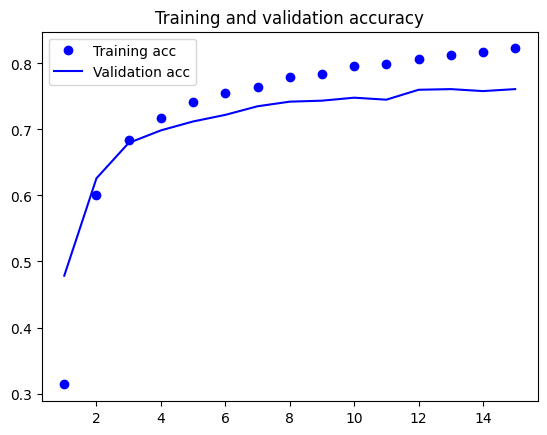

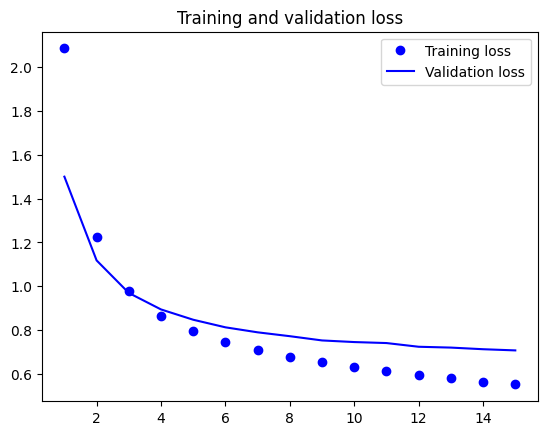

In [ ]:

import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

My baseline model is very simple. The first layer is to add the frozen conv base of MobileNetV2 followed by a global average pooling 2d layer. The final layer is the output layer with 10 output neurons and using softmax activation. I compile it with Adam optimizer with a learning rate of 1e-4. I also set the loss and metrics to sparse categorical crossentropy and accuracy respectively. I fit it with 15 epochs and added early stopping. However without much scaling, the baseline model is already overfitted hence we can proceed to add regularization.


For my baseline model , I preprocessed the data without adding data augmentation to create a clean and unaltered reference point for performance. It is to show how well it can perform with raw data. Hence for the following models, it is trained on augmented data.

## Data Augmentation

Since it is now overfitted, we add data augmentation to reduce the overfitting and improve generalisation

In [ ]:
from tensorflow.keras.applications.xception import preprocess_input

base_dir = '/content/drive/MyDrive/assg'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

img_size = 150
batch_size = 32
num_classes = 10


#Data Augmentation for Training only for Val/Test
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='sparse'
)

validation_generator = test_val_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='sparse'
)

test_generator = test_val_datagen.flow_from_directory(
    test_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)



Found 7500 images belonging to 10 classes.
Found 2000 images belonging to 10 classes.
Found 500 images belonging to 10 classes.


## Model 1 (Added dense layer, regularization and dropout)

For my first model, I have made quite a few changes as compared to the baseline model. I had added a dense layer with 128 units, using relu activation with added regularization. I had set the weight of the L2 regularization to be 1e-4 as a starting point. This is followed by a dropout, with a dropout size of 0.5.  It is followed by another set of dense layer and dropout but this dense layer only has 64 units. It helps the network to compress and select the most important features before final classification.


In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4))) #added regularization, added layer
model.add(layers.Dropout(0.5)) #added dropout too
model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularizers.l2(1e-4)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax', kernel_regularizer=regularizers.l2(1e-4)))


model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator),
    callbacks=[early_stop]
)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 104s 391ms/step - accuracy: 0.1305 - loss: 2.8231 - val_accuracy: 0.3705 - val_loss: 2.0459
Epoch 2/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 82s 349ms/step - accuracy: 0.2353 - loss: 2.1342 - val_accuracy: 0.5045 - val_loss: 1.7495
Epoch 3/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 142s 348ms/step - accuracy: 0.3177 - loss: 1.9240 - val_accuracy: 0.5845 - val_loss: 1.5038
Epoch 4/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 82s 348ms/step - accuracy: 0.3980 - loss: 1.7582 - val_accuracy: 0.6275 - val_loss: 1.3473
Epoch 5/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 82s 349ms/step - accuracy: 0.4581 - loss: 1.6057 - val_accuracy: 0.6560 - val_loss: 1.2156
Epoch 6/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 144s 357ms/step - accuracy: 0.4748 - loss: 1.5300 - val_accuracy: 0.6745 - val_loss: 1.1472
Epoch 7/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 82s 349ms/step - accuracy: 0.5105 - loss: 1.4485 - val_accuracy: 0.6890 - val_loss: 1.0634
Epoch 8/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 82s 349ms/step - accuracy: 0.5463 - loss

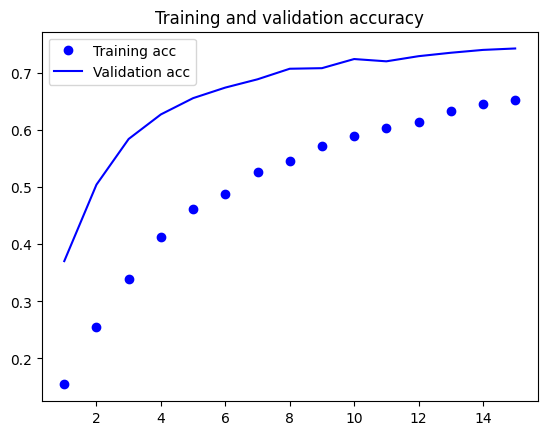

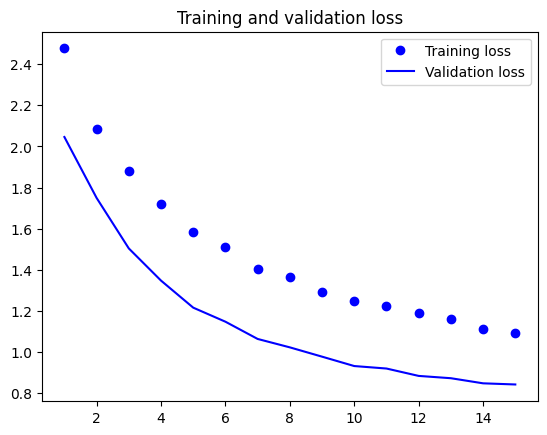

In [ ]:
model.save('/content/drive/MyDrive/assg/food_model_1.h5')

acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

This model has actually helped to improve validation performance and indicate better generalization even though it is slightly underfitting. The validation does better than training with a peak accuracy of 74.30% as compared to 65.76%

## Model 2 (Reduce number of dense layers)

I decided to reduce the number of dense layers, where i removed the dense layer with 64 units. I removed it to help improve generalization and efficiency, making the model simpler and prevent it from learning unnecessary complexity that does not generalize well. I also removed one dropout along with the dense layer. Other than these 2, the others remains the same as model 1, with the same layers.

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(1e-4)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l2(1e-4)))  #reduced number of dense layers

model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator),
    callbacks=[early_stop]
)

Epoch 1/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 107s 418ms/step - accuracy: 0.2156 - loss: 2.5467 - val_accuracy: 0.5920 - val_loss: 1.3337
Epoch 2/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 83s 355ms/step - accuracy: 0.4943 - loss: 1.5236 - val_accuracy: 0.6795 - val_loss: 1.0464
Epoch 3/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 140s 349ms/step - accuracy: 0.5877 - loss: 1.2601 - val_accuracy: 0.7100 - val_loss: 0.9226
Epoch 4/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 83s 354ms/step - accuracy: 0.6262 - loss: 1.1328 - val_accuracy: 0.7160 - val_loss: 0.8729
Epoch 5/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 84s 356ms/step - accuracy: 0.6581 - loss: 1.0542 - val_accuracy: 0.7395 - val_loss: 0.8252
Epoch 6/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 84s 356ms/step - accuracy: 0.6933 - loss: 0.9579 - val_accuracy: 0.7390 - val_loss: 0.8067
Epoch 7/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 83s 353ms/step - accuracy: 0.6839 - loss: 0.9764 - val_accuracy: 0.7500 - val_loss: 0.7785
Epoch 8/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 97s 414ms/step - accuracy: 0.7110 - loss:

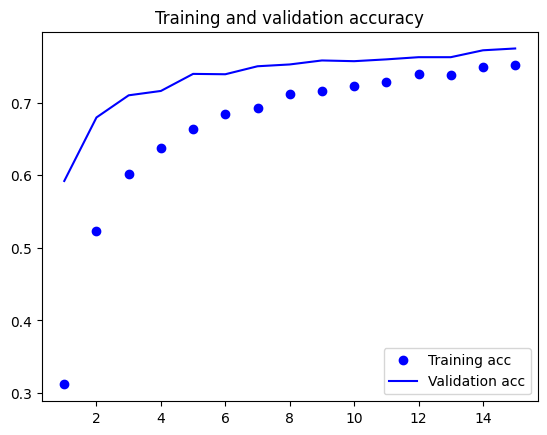

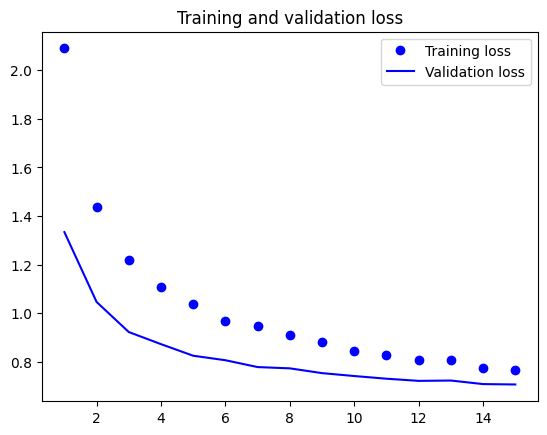

In [ ]:
model.save('/content/drive/MyDrive/assg/food_model_2.h5')

acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

This model ended up generalizing much better, with a minimal gap between the training and validation accuracy. It also has a higher training and validation accuracy peak with 76.09% and 77.45% respectively. This shows that removing the number of dense layer indeed does makes the model perform better

## Model 3 (Added BatchNormalization)

Continuing from Model 2, I had tried to add BatchNormalization. In theory, this would help to stabilize and allow better performance with higher accuracy and generalization in a faster training time. It normalizes each layer’s input in a batch which helps with noise-based regularization. The other hyperparameters (learning rate and dropout rate etc.) are kept the same from model 2.

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(1e-4)))
model.add(layers.BatchNormalization()) #added batchnormalisation
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l2(1e-4)))

model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator),
    callbacks=[early_stop]
)

Epoch 1/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 104s 395ms/step - accuracy: 0.2200 - loss: 2.8530 - val_accuracy: 0.6065 - val_loss: 1.2214
Epoch 2/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 82s 348ms/step - accuracy: 0.5222 - loss: 1.5069 - val_accuracy: 0.6890 - val_loss: 0.9897
Epoch 3/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 83s 353ms/step - accuracy: 0.6145 - loss: 1.2611 - val_accuracy: 0.7215 - val_loss: 0.8924
Epoch 4/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 141s 349ms/step - accuracy: 0.6396 - loss: 1.1323 - val_accuracy: 0.7420 - val_loss: 0.8412
Epoch 5/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 83s 354ms/step - accuracy: 0.6817 - loss: 1.0087 - val_accuracy: 0.7510 - val_loss: 0.7969
Epoch 6/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 141s 351ms/step - accuracy: 0.6937 - loss: 0.9629 - val_accuracy: 0.7605 - val_loss: 0.7803
Epoch 7/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 81s 346ms/step - accuracy: 0.6994 - loss: 0.9269 - val_accuracy: 0.7610 - val_loss: 0.7645
Epoch 8/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 88s 371ms/step - accuracy: 0.7147 - loss

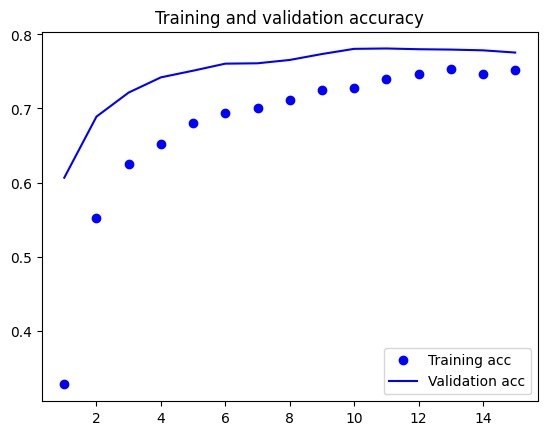

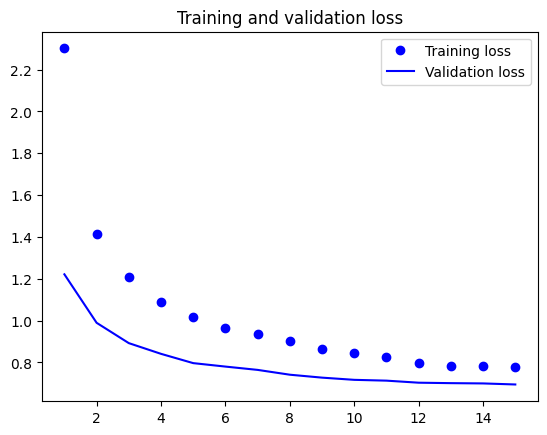

In [ ]:
model.save('/content/drive/MyDrive/assg/food_model_3.h5')
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

After testing and running, it shows that the validation accuracy consistently improved across nearly every epoch.  There is also a smaller gap between training and validation accuracy, indicating lower overfitting and better generalization. It also hit a higher validation accuracy of 77.55%


## Model 4 (Fine-tuning [40 layers])

My model is exactly the same as model 3 in terms of the layers and architecture where the activation, L2 regularization weight and dropout rate is the same. However, I unfroze last 40 layers of the pre-trained MobileNetV2 for fine-tuning. This means that I would train the last 40 layers on our specific dataset. This preserves the general image features learnt but helps to adapt better to our specific food classification problem. In theory, this would help our model to generalise better with higher accuracy since it is trained specific to our task.


In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax',
                       kernel_regularizer=regularizers.l2(1e-4)))

conv_base.trainable = True
for layer in conv_base.layers[:-40]: #unfreezing 40 layers for fine tuning of MobileNetV2
    layer.trainable = False


model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator),
    callbacks=[early_stop]
)

Epoch 1/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 117s 416ms/step - accuracy: 0.3474 - loss: 2.3651 - val_accuracy: 0.5685 - val_loss: 1.7025
Epoch 2/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 118s 351ms/step - accuracy: 0.6839 - loss: 1.0515 - val_accuracy: 0.6650 - val_loss: 1.2260
Epoch 3/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 144s 362ms/step - accuracy: 0.7469 - loss: 0.8293 - val_accuracy: 0.7500 - val_loss: 0.9142
Epoch 4/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 140s 352ms/step - accuracy: 0.7922 - loss: 0.6907 - val_accuracy: 0.8030 - val_loss: 0.7273
Epoch 5/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 141s 347ms/step - accuracy: 0.8080 - loss: 0.6108 - val_accuracy: 0.7780 - val_loss: 0.7876
Epoch 6/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 82s 350ms/step - accuracy: 0.8335 - loss: 0.5327 - val_accuracy: 0.8080 - val_loss: 0.6882
Epoch 7/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 141s 347ms/step - accuracy: 0.8558 - loss: 0.4625 - val_accuracy: 0.8140 - val_loss: 0.6592
Epoch 8/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 82s 351ms/step - accuracy: 0.8731 - l

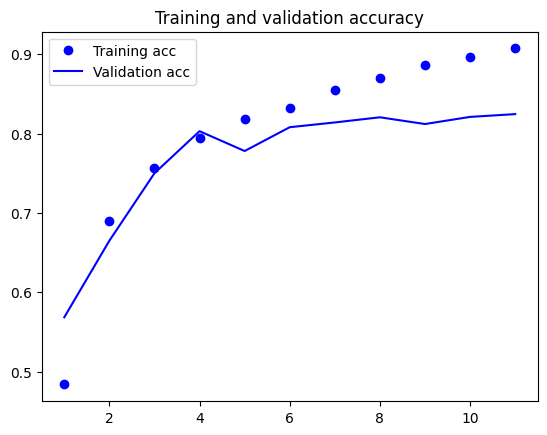

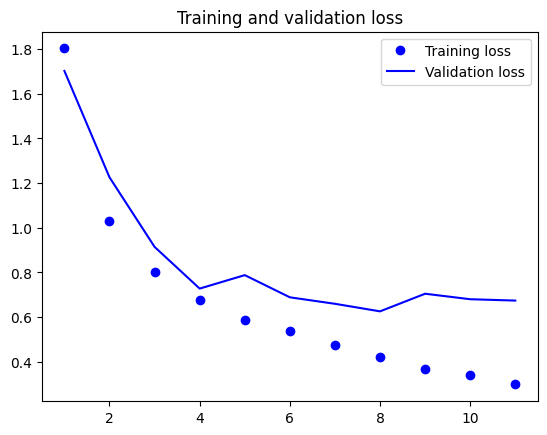

In [ ]:
model.save('/content/drive/MyDrive/assg/food_model_4.h5')
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

As shown, there is a huge validation accuracy increase from 78.10% to 82.45%. The loss steadily decreases in model 4 and validation accuracy closely tracks with training accuracy. However it is still overfitted, and we would work on it further to fix it.

## Model 5 (Fine-tuning [30 layers])

This model is identical to model 4, but I tried to unfreeze fewer layers to reduce overfitting. In this model, I unfroze only the last 30 layers. The intention of this change is to minimize overfitting while still benefiting from the fine-tuning. When too many layers are unfrozen, a large portion of the pre-trained model is trained on the new dataset, potentially memorizing noise or specific patterns. Hence unfreezing lesser layers would help to reduce this risk.


In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax',
                       kernel_regularizer=regularizers.l2(1e-4)))

conv_base.trainable = True
for layer in conv_base.layers[:-30]: #reduce number of unfrozen layers to reduce overfit
    layer.trainable = False


model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator),
    callbacks=[early_stop]
)

Epoch 1/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 118s 432ms/step - accuracy: 0.5849 - loss: 1.3913 - val_accuracy: 0.7915 - val_loss: 0.7420
Epoch 2/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 82s 351ms/step - accuracy: 0.8485 - loss: 0.4889 - val_accuracy: 0.8125 - val_loss: 0.6783
Epoch 3/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 83s 354ms/step - accuracy: 0.8768 - loss: 0.4210 - val_accuracy: 0.8345 - val_loss: 0.6043
Epoch 4/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 142s 353ms/step - accuracy: 0.8896 - loss: 0.3622 - val_accuracy: 0.8210 - val_loss: 0.6588
Epoch 5/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 141s 350ms/step - accuracy: 0.9044 - loss: 0.3282 - val_accuracy: 0.8185 - val_loss: 0.7049
Epoch 6/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 82s 350ms/step - accuracy: 0.9130 - loss: 0.2957 - val_accuracy: 0.8265 - val_loss: 0.6353


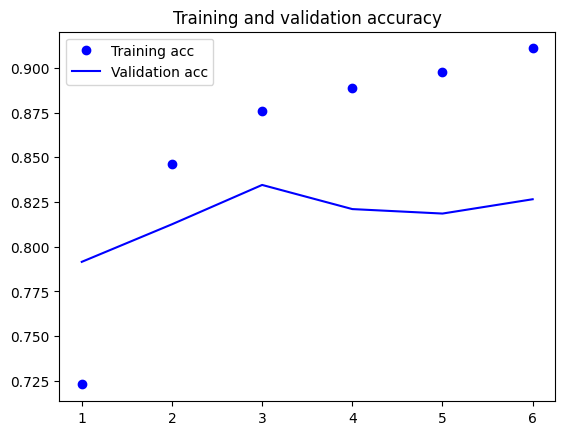

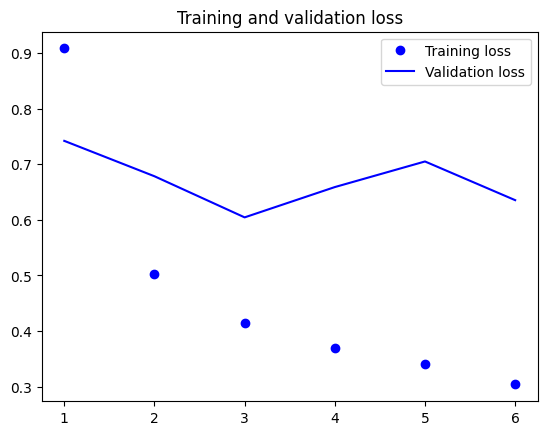

In [ ]:
model.save('/content/drive/MyDrive/assg/food_model_5.h5')
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Although it still shows overfitting, the model has a higher training accuracy and better loss, showing that it is learning more efficiently. There is also a slight improvement in the validation accuracy.

## Model 6 (Fine-tuning [60 layers])

Since in model 5, I had unfreeze fewer layers, i wanted to explore the opposite scenario where i unfreeze more layers. So in this model, i chose to unfreeze the last 60 layers of the pre-trained MobileNetV2. The idea was to provide the model with more capacity to learn features that are specific to the food classification task like patterns, textures or shapes. By fine tuning a larger portion, the model has a greater flexibility to adapt the pre-trained learnt features and more relevant features.

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax',
                       kernel_regularizer=regularizers.l2(1e-4)))

conv_base.trainable = True
for layer in conv_base.layers[:-60]: #trying out with increased unfrozen layers
    layer.trainable = False


model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator),
    callbacks=[early_stop]
)

Epoch 1/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 338s 1s/step - accuracy: 0.6373 - loss: 1.2125 - val_accuracy: 0.8215 - val_loss: 0.6425
Epoch 2/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 318s 1s/step - accuracy: 0.8583 - loss: 0.4828 - val_accuracy: 0.8195 - val_loss: 0.6890
Epoch 3/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 319s 1s/step - accuracy: 0.8764 - loss: 0.4258 - val_accuracy: 0.8355 - val_loss: 0.6166
Epoch 4/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 361s 2s/step - accuracy: 0.8932 - loss: 0.3542 - val_accuracy: 0.8225 - val_loss: 0.6723
Epoch 5/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 318s 1s/step - accuracy: 0.9083 - loss: 0.3180 - val_accuracy: 0.8320 - val_loss: 0.6346
Epoch 6/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 315s 1s/step - accuracy: 0.9098 - loss: 0.2938 - val_accuracy: 0.8280 - val_loss: 0.6685


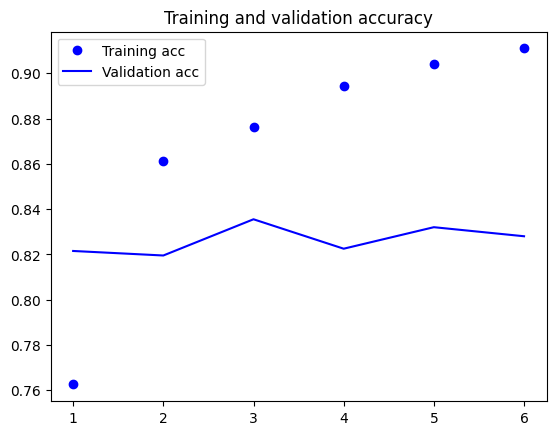

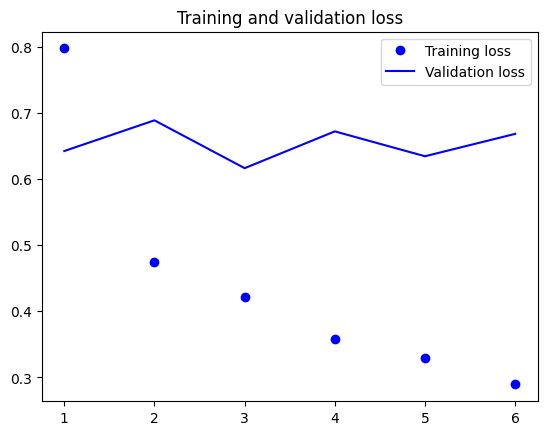

In [ ]:
model.save('/content/drive/MyDrive/assg/food_model_6.h5')
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

As shown, it does have a higher training accuracy, peaking 91.30% , hence showing that it is learning better. However it has a higher validation loss despite it has a higher validation accuracy than model 5.

## Model 7 (Increase dropout)[30 layers]

After comparing the number of layers to unfreeze between model 4,5 and 6, Model 5 gave us the best results. It has a high validation accuracy with the lowest validation loss, which is important for a stable performance, hence we would continue to work with it. We found that the sweet spot of trainable layers is 30 which provides a balanced trade-off between training capacity and generalisation. But since model 5 was overfitting, I tried to increase the dropout rate from 0.5 to 0.6. This would force the model to learn more generalized features and reduce overfitting.

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(1e-4)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.6)) #increased dropout rate (0.5->0.6)
model.add(layers.Dense(num_classes, activation='softmax',
                       kernel_regularizer=regularizers.l2(1e-4)))

conv_base.trainable = True
for layer in conv_base.layers[:-30]:
    layer.trainable = False


model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator),
    callbacks=[early_stop]
)

Epoch 1/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 333s 1s/step - accuracy: 0.6409 - loss: 1.1862 - val_accuracy: 0.8250 - val_loss: 0.6165
Epoch 2/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 320s 1s/step - accuracy: 0.8730 - loss: 0.4483 - val_accuracy: 0.8365 - val_loss: 0.6412
Epoch 3/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 359s 2s/step - accuracy: 0.8767 - loss: 0.4293 - val_accuracy: 0.8395 - val_loss: 0.6302
Epoch 4/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 317s 1s/step - accuracy: 0.9021 - loss: 0.3376 - val_accuracy: 0.8180 - val_loss: 0.6792


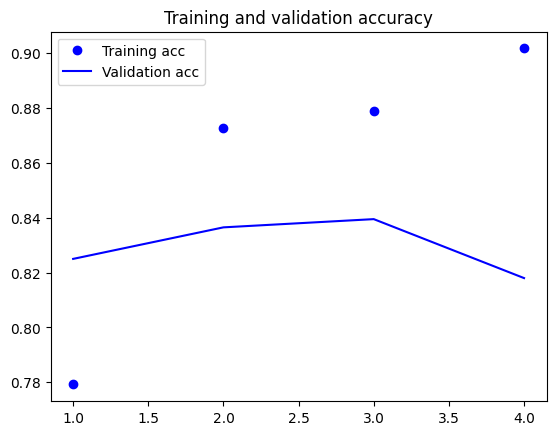

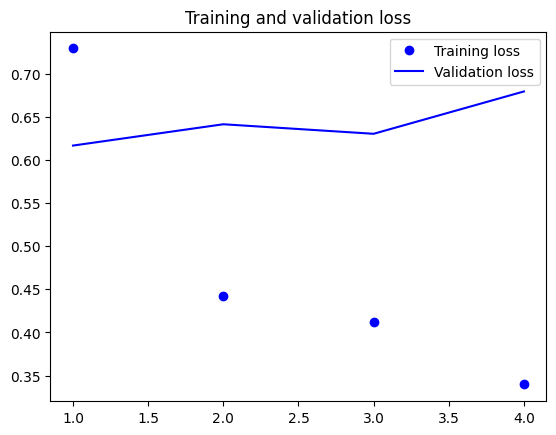

In [ ]:
model.save('/content/drive/MyDrive/assg/food_model_7.h5')
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

After running, it did decrease overfitting as compared to model 6 in the first few epochs but there is a slightly more overfitting in the later epochs. Although very marginal, it did show slight improvement in overfitting by about 0.37%

## Model 8 (Added a dense layer)

Since my model is still really badly overfitted by around 8-9% , I decided to add an additional dense layer. By adding another dense layer with Relu activation would allow the model to learn more abstract and complex patterns. This would help is capture and understand the differences between the food classes. This added capacity can help improve generalization as it enables the model to adapt better to the validation data, instead of memorizing. I also decreased learning rate to try and reduce overfitting.

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.GlobalAveragePooling2D())

model.add(layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(1e-4)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l2(1e-4))) #added dense layer
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))

model.add(layers.Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l2(1e-4)))


conv_base.trainable = True
for layer in conv_base.layers[:-30]:
    layer.trainable = False

model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-5),   # Reduce LR (1e-4 -> 1e-5)
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator),
    callbacks=[early_stop]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 7192s 31s/step - accuracy: 0.1147 - loss: 3.4887 - val_accuracy: 0.1790 - val_loss: 2.5162
Epoch 2/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 124s 358ms/step - accuracy: 0.1498 - loss: 3.1600 - val_accuracy: 0.2785 - val_loss: 2.1895
Epoch 3/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 83s 354ms/step - accuracy: 0.1983 - loss: 2.8455 - val_accuracy: 0.3730 - val_loss: 1.9232
Epoch 4/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 85s 361ms/step - accuracy: 0.2418 - loss: 2.6127 - val_accuracy: 0.4490 - val_loss: 1.7139
Epoch 5/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 139s 350ms/step - accuracy: 0.2761 - loss: 2.4779 - val_accuracy: 0.4980 - val_loss: 1.5609
Epoch 6/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 84s 358ms/step - accuracy: 0.3221 - loss: 2.2004 - val_accuracy: 0.5390 - val_loss: 1.4553
Epoch 7/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 141s 353ms/step - accuracy: 0.3641 - loss: 2.0999 - val_accuracy: 0.5725 - val_loss: 1.3640
Epoch 8/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 142s 351ms/step - accuracy: 0.3789 - los

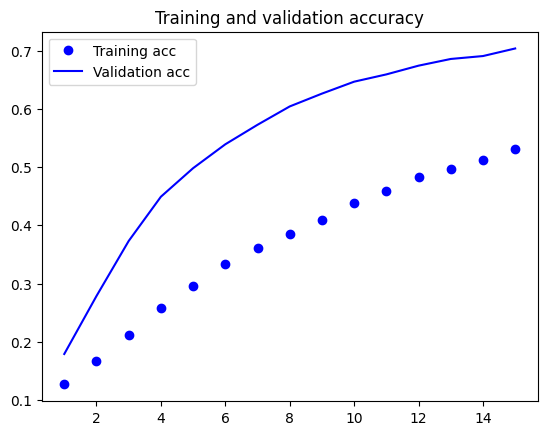

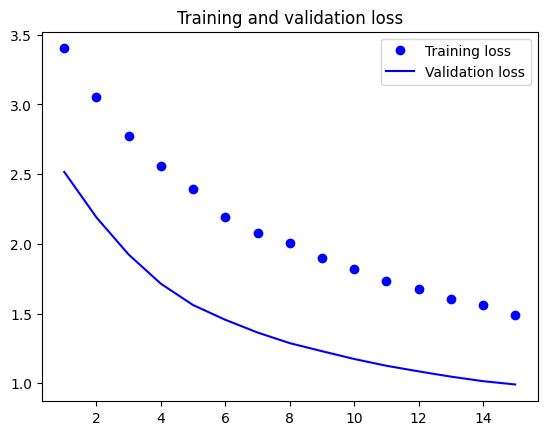

In [ ]:
model.save('/content/drive/MyDrive/assg/food_model8.h5')
acc      = history.history['accuracy']
val_acc  = history.history['val_accuracy']
loss     = history.history['loss']
val_loss = history.history['val_loss']


epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


However, unlike my expectations, my model turned out to underfit really badly with a training accuracy of 43.16% and validation accuracy of 68.00%.

## Model 9 (Remove batchnormalisation)

My previous model underfitted really badly but I suspect that it is due to the batchnormalisation(). When a new dense layer is added to a model with batch normalisation, it likely clashed with the added dropout. Dropout randomly zeroes activation hence the BatchNormalisation might see the wildly fluctuating variance since i am normalizing a randomly masked signal. Hence it is better to remove BatchNormalisation.


In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(128, activation='relu',kernel_regularizer=regularizers.l2(1e-4)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu',kernel_regularizer=regularizers.l2(1e-4)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax',kernel_regularizer=regularizers.l2(1e-4)))
#remove Batchnormalisation()

conv_base.trainable = True
for layer in conv_base.layers[:-30]:
    layer.trainable = False


model.compile(
    optimizer=optimizers.Adam(learning_rate=1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator),
    callbacks=[early_stop]
)

Epoch 1/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 374s 1s/step - accuracy: 0.1401 - loss: 2.7820 - val_accuracy: 0.5685 - val_loss: 1.5676
Epoch 2/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 379s 1s/step - accuracy: 0.3590 - loss: 1.8420 - val_accuracy: 0.7645 - val_loss: 1.0892
Epoch 3/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 384s 1s/step - accuracy: 0.5317 - loss: 1.4276 - val_accuracy: 0.8145 - val_loss: 0.8286
Epoch 4/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 331s 1s/step - accuracy: 0.6048 - loss: 1.2026 - val_accuracy: 0.8340 - val_loss: 0.6912
Epoch 5/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 376s 1s/step - accuracy: 0.6615 - loss: 1.0716 - val_accuracy: 0.8455 - val_loss: 0.6210
Epoch 6/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 330s 1s/step - accuracy: 0.6875 - loss: 0.9948 - val_accuracy: 0.8485 - val_loss: 0.5855
Epoch 7/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 380s 1s/step - accuracy: 0.7273 - loss: 0.8722 - val_accuracy: 0.8515 - val_loss: 0.5661
Epoch 8/15
235/235 ━━━━━━━━━━━━━━━━━━━━ 363s 2s/step - accuracy: 0.7472 - loss: 0.8376 - val_accu

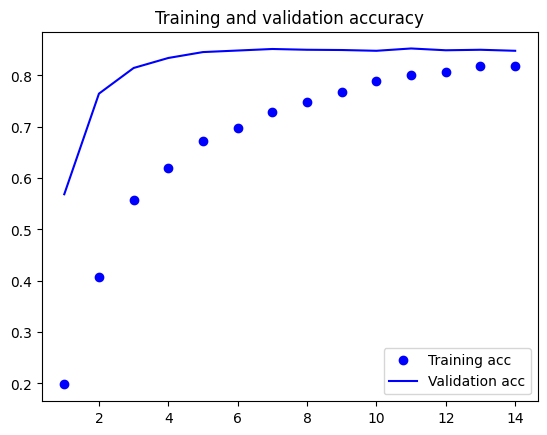

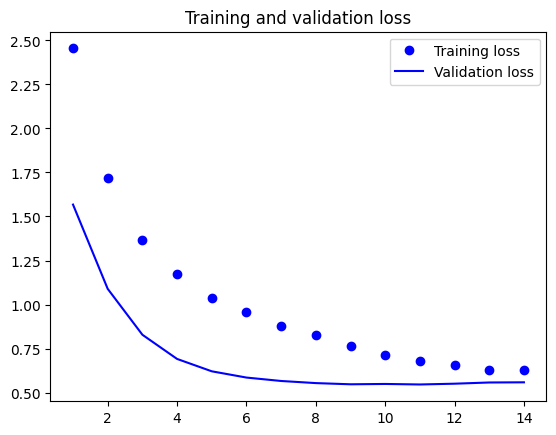

In [ ]:
model.save('/content/drive/MyDrive/assg/food_model_9.h5')

acc      = history['accuracy']
val_acc  = history['val_accuracy']
loss     = history['loss']
val_loss = history['val_loss']


epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

It is evident that it tremendously helped with generalization. This model has a training accuracy that peaks 82.07% and validation accuracy that peaks 84.80%. There is also a smaller gap between the training and validation accuracy, suggesting better generalization.



# Step 3 – Evaluate the Developed Models using Testing Images

During the testing and evaluation phase of this food image classification task, 9 different models were being evaluated to determine their ability to generalize and predict on unseen data. We would be using the reserved test data (500 images) to try and test the model since it has not seen the test data before, reenacting as real-world unseen data.

Each model are being assessed on 2 metrics, test accuracy and test loss. Test accuracy shows the percentage of correct predictions while test loss measures how confident or close the predictions are to the correct ones. A lower test loss implies that the model is not only accurate but has confident predictions.

After loading the saved models, baseline model and model 1 to model 8, our test accuracy and test loss are evaluated.

In [ ]:
# This process is iterative and during the process, you may end up with several improvements of the model.

## Baseline Model

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/assg/baseline_food_model.h5')
test_loss, test_acc = model.evaluate(test_generator, verbose=0)
print("Baseline Food model")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Baseline Food model
Test Loss: 0.8356
Test Accuracy: 0.7060


The baseline model performed reasonably well with a 70.60% test accuracy and loss of 0.8356. It used a simple CNN structure with minimal tuning. It establishes a benchmark for evaluating the subsequent tuned models.

## Model 1

Changes made from previous model: Added regularization and dropout

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/assg/food_model_1.h5')
test_loss, test_acc = model.evaluate(test_generator, verbose=0)
print("Food model 1")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Food model 1
Test Loss: 0.9337
Test Accuracy: 0.6920



Model 1 had surprisingly performed worse than the baseline, with a test accuracy of 69.20% and a higher loss of 0.9337. This suggests that the model is underfitted.


## Model 2

Changes made from previous model: Reduced number of dense layers

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/assg/food_model_2.h5')
test_loss, test_acc = model.evaluate(test_generator, verbose=0)
print("Food model 2")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Food model 2
Test Loss: 0.8193
Test Accuracy: 0.7040



Model 2 shows evident improvements compared to model 1. It slightly outperformed the baseline with a test accuracy of 70.40% and has reduced test loss of 0.8193.


## Model 3

Changes made from previous model: Added Batch Normalisation

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/assg/food_model_3.h5')
test_loss, test_acc = model.evaluate(test_generator, verbose=0)
print("Food model 3")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Food model 3
Test Loss: 0.8151
Test Accuracy: 0.7220


Model 3 shows significant improvement, reaching 72.20% accuracy and lower test loss of 0.8151. There is a 2.20% increase in accuracy and 0.0042 in loss. This suggests that the BatchNormalisation had actually worked better than without.

## Model 4

Changes made from previous model: Fine-tuning 40 layers

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/assg/food_model_4.h5')
test_loss, test_acc = model.evaluate(test_generator, verbose=0)
print("Food model 4")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Food model 4
Test Loss: 0.8057
Test Accuracy: 0.7840


From model 4 onwards, there is a huge jump in test accuracy.
Model 4 also shows a very strong improvement with a test accuracy of 78.40%. The loss is also the lowest so far with 0.8057, indicating improvement in model confidence. This jump suggests better regularization which helped generalise better on unseen data.


## Model 5

Changes made from previous model: Fine-tuning 30 layers

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/assg/food_model_5.h5')
test_loss, test_acc = model.evaluate(test_generator, verbose=0)
print("Food model 5")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Food model 5
Test Loss: 0.7646
Test Accuracy: 0.7900


Model 5 also had an increased accuracy of 79.00% and loss of 0.7647, showing a strong balance of test accuracy and loss. This also indicates that there are more consistent predictions.


## Model 6

Changes made from previous model: Fine-tuning 60 layers

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/assg/food_model_6.h5')
test_loss, test_acc = model.evaluate(test_generator, verbose=0)
print("Food model 6")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Food model 6
Test Loss: 0.8422
Test Accuracy: 0.7960


Model 6 performed similarly to model 5, with a slight increase in accuracy of 79.60% accuracy, although it has a higher loss of 0.8422. This suggests that it has more uncertainty in prediction confidence.


## Model 7

Changes made from previous model: Fine tuning 30 layers with increased dropout

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/assg/food_model_7.h5')
test_loss, test_acc = model.evaluate(test_generator, verbose=0)
print("Food model 7")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Food model 7
Test Loss: 0.8197
Test Accuracy: 0.7920


Model 7 had a slight drop in accuracy of about 0.40% with 79.20% but a better test loss compared to model 6 with 0.8197. It is evident that there is a strong generalization capability.


## Model 8

Changes made from previous model: Adding a dense layer

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/assg/food_model8.h5')
test_loss, test_acc = model.evaluate(test_generator, verbose=0)
print("Food model 8") #rerun
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

Food model 8
Test Loss: 1.0832
Test Accuracy: 0.6480


Model 8 performed the worst among all 8 models, with it being underfitted. It was likely due to the batchnormalisation interfering with the dropout.

## Model 9

Changes made from previous model: Removed batch normalisation

In [ ]:
model = keras.models.load_model('/content/drive/MyDrive/assg/food_model_9.h5')
test_loss, test_acc = model.evaluate(test_generator, verbose=0)
print("Food model 9")
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Food model 9
Test Loss: 0.6740
Test Accuracy: 0.8120


Finally, it is evident that model 9 is the best performer with the highest test accuracy of 81.20% and lowest test loss of 0.6740. This combination reflects not only its accuracy in correctly classifying the food images but also a high level of certainty in its outputs. This is likely to produce stable predictions with less noise.


## Best Model

In [ ]:
# Save the best model

model = keras.models.load_model('/content/drive/MyDrive/assg/food_model_9.h5')
model.save('food_model_best.h5')

Overall, as I evaluated each model, it is evident that the methods that I tried to use to reduce overfitting and improve generalization are effective. It is shown by the steady increase in test accuracy from model 1, subsequently to model 8, even if its marginal (or have slight decrease). The final model, model 9, maintains a healthy alignment between validation and test performance, showing better feature learning. It is the most balanced and confident classifier, hence being the most suitable candidate for deployment.

# Step 4  – Use the best model to make prediction

To apply the food classification model in real-life scenarios, the image must be processed first into a format that is compatible with the model’s input expectations.


In [ ]:
# Load the model
model = keras.models.load_model('/content/drive/MyDrive/assg/food_model_9.h5')

In [ ]:
# Load the food list (in alphabetical order)
with open('/content/drive/MyDrive/assg/21.txt', 'r') as f: # the .txt file which contains a list of food assigned to you
    x = f.readlines()
food_list =[]
for item in x:
    food_list.append(item.strip('\n'))
food_list = sorted(food_list) # food_list needs to be sorted alphabetically before feed into prediction() function
print(food_list)

['baby_back_ribs', 'beef_tartare', 'churros', 'crab_cakes', 'donuts', 'grilled_cheese_sandwich', 'lasagna', 'macaroni_and_cheese', 'seaweed_salad', 'shrimp_and_grits']


Firstly, we resize the image to a standardized size in my project of 150x150. Then we convert it into a numerical array using img_to_array and then normalize the pixel values to the range of 0-1. Then we add a batch dimension so that the image can be passed into the model to predict. We created 2 functions to perform these steps to apply to each model.

In [ ]:
# Define some related functions for image process and model prediction
from tensorflow.keras.preprocessing.image import load_img, img_to_array
def image_process(img):
    image = load_img(img, target_size =(img_size, img_size))
    image_array = img_to_array(image)/255
    return image_array

import pandas as pd
def prediction(model, img_array, items_l):
    prob = model.predict(img_array.reshape(1,img_size,img_size,3))
    pro_df = pd.DataFrame(prob, columns = items_l)
    result = items_l[np.argmax(prob)]
    return pro_df, result

I then downloaded 10 different images, all chosen randomly with no bias, and uploaded it into the file for prediction. I then applied the functions that I mentioned above for proper prediction. Then i feed the 10 different images into the model. When a prediction is made, the model outputs a probability distribution across the 10 food classes. The class with the highest probability would be predicted label.

## Baby Back Ribs

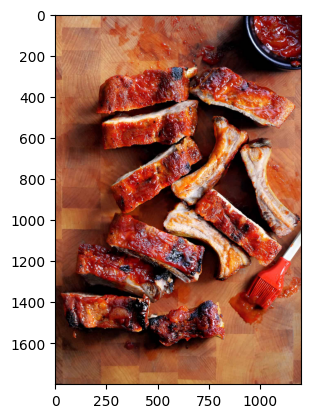

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
The prediction is:  baby_back_ribs 

    baby_back_ribs  beef_tartare   churros  crab_cakes    donuts  \
0        0.405095      0.010245  0.335089    0.020525  0.164423   

   grilled_cheese_sandwich   lasagna  macaroni_and_cheese  seaweed_salad  \
0                 0.006965  0.001357             0.006298       0.009871   

   shrimp_and_grits  
0          0.040131  


In [ ]:
# Make prediction for the image you downloaded from internet

img = '/content/drive/My Drive/assg/babybackribs.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

The model was able to correctly predict baby back ribs with 40.50% confidence level.

## Beef Tartare

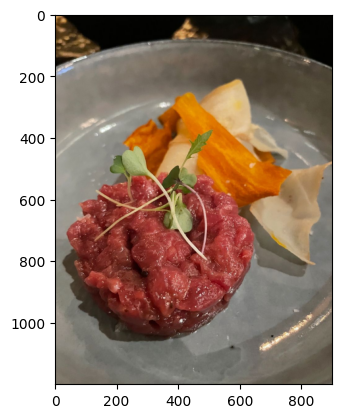

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
The prediction is:  beef_tartare 

    baby_back_ribs  beef_tartare   churros  crab_cakes    donuts  \
0        0.000022      0.996547  0.000112     0.00018  0.000919   

   grilled_cheese_sandwich  lasagna  macaroni_and_cheese  seaweed_salad  \
0                 0.000404  0.00008             0.000283       0.000417   

   shrimp_and_grits  
0          0.001036  


In [ ]:
# Make prediction for the image you downloaded from internet
img = '/content/drive/My Drive/assg/beeftartare2.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

The model was able to correctly predict beef tartare with 99.65% confidence level.

## Churros

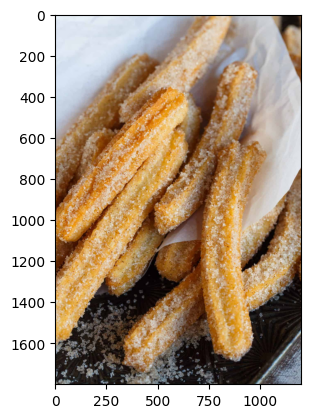

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
The prediction is:  churros 

    baby_back_ribs  beef_tartare   churros  crab_cakes    donuts  \
0    2.016969e-08  2.868863e-08  0.999984     0.00001  0.000004   

   grilled_cheese_sandwich       lasagna  macaroni_and_cheese  seaweed_salad  \
0             2.795006e-07  2.248525e-09         2.190302e-08       0.000001   

   shrimp_and_grits  
0      4.203340e-08  


In [ ]:
# Make prediction for the image you downloaded from internet

img = '/content/drive/My Drive/assg/churro.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

The model was able to correctly predict churros with 99.998% confidence level.

## Crab Cakes

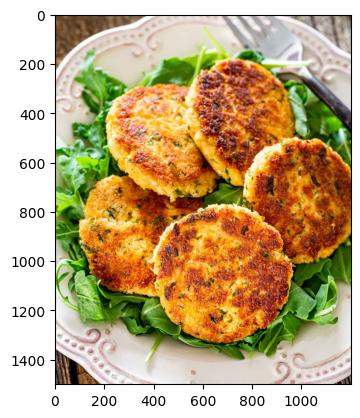

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
The prediction is:  crab_cakes 

    baby_back_ribs  beef_tartare   churros  crab_cakes    donuts  \
0        0.000456      0.009699  0.002169    0.982583  0.000816   

   grilled_cheese_sandwich   lasagna  macaroni_and_cheese  seaweed_salad  \
0                 0.000912  0.000504             0.001141       0.000627   

   shrimp_and_grits  
0          0.001094  


In [ ]:
# Make prediction for the image you downloaded from internet
img = '/content/drive/My Drive/assg/crabcakes.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

The model was able to correctly predict crab cakes with 98.26% confidence level.

## Donuts

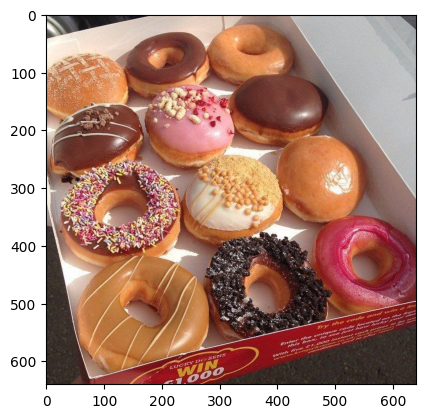

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
The prediction is:  donuts 

    baby_back_ribs  beef_tartare   churros  crab_cakes    donuts  \
0        0.000006      0.000084  0.000811    0.000009  0.998927   

   grilled_cheese_sandwich   lasagna  macaroni_and_cheese  seaweed_salad  \
0                 0.000092  0.000031             0.000008       0.000008   

   shrimp_and_grits  
0          0.000023  


In [ ]:
# Make prediction for the image you downloaded from internet

img = '/content/drive/My Drive/assg/donut.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

The model was able to correctly predict donuts with 99.89% confidence level.

## Grilled Cheese Sandwich 1

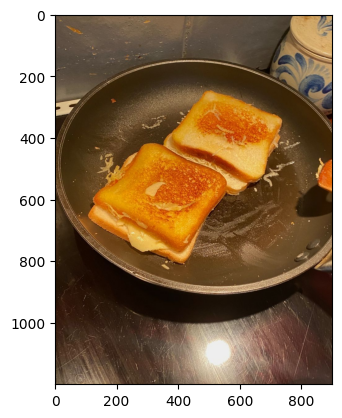

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
The prediction is:  churros 

    baby_back_ribs  beef_tartare   churros  crab_cakes    donuts  \
0        0.044069      0.075588  0.426375    0.040631  0.060645   

   grilled_cheese_sandwich   lasagna  macaroni_and_cheese  seaweed_salad  \
0                 0.106604  0.071145             0.035596       0.111104   

   shrimp_and_grits  
0          0.028244  


In [ ]:
# Make prediction for the image you downloaded from internet

img = '/content/drive/My Drive/assg/grilledcheese.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

The model has incorrectly predicted ‘Churros” with 42.63% confidence for a image that was actually a “grilled cheese sandwich”. This error is likely to be caused by the similar golden brown colour and crispy texture that both foods have. It likely confused the model’s visual feature detectors. The background of the frying pan in the image and lack of clear sandwich shape may have led the model to misinterpret.

## Grilled Cheese Sandwich 2

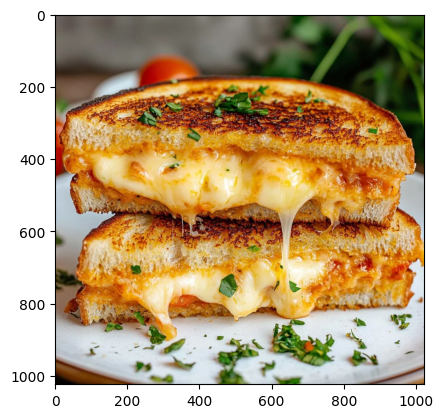

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
The prediction is:  grilled_cheese_sandwich 

    baby_back_ribs  beef_tartare   churros  crab_cakes    donuts  \
0         0.00092       0.00145  0.001048     0.00028  0.000254   

   grilled_cheese_sandwich   lasagna  macaroni_and_cheese  seaweed_salad  \
0                 0.993464  0.001031             0.001085       0.000284   

   shrimp_and_grits  
0          0.000183  


In [ ]:
# Make prediction for the image you downloaded from internet

img = '/content/drive/My Drive/assg/grilledcheesesandwich.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

On the other hand, it was able to predict grilled cheese sandwich with 99.35% confidence for another image that I had tried with. This shows limitations of the model.


## Lasagna

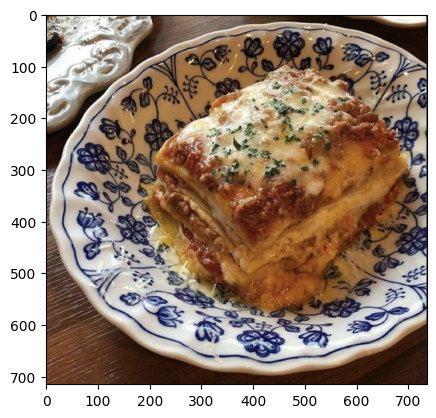

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
The prediction is:  lasagna 

    baby_back_ribs  beef_tartare   churros  crab_cakes   donuts  \
0        0.001764      0.008581  0.005532    0.004849  0.00959   

   grilled_cheese_sandwich   lasagna  macaroni_and_cheese  seaweed_salad  \
0                 0.018274  0.911245             0.018064       0.010074   

   shrimp_and_grits  
0          0.012026  


In [ ]:
# Make prediction for the image you downloaded from internet

img = '/content/drive/My Drive/assg/lasagna2.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

The model was able to correctly predict lasagna with 99.91.12% confidence level.

## Macaroni And Cheese

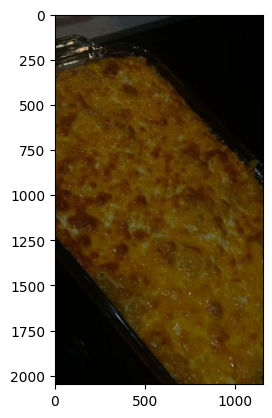

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
The prediction is:  macaroni_and_cheese 

    baby_back_ribs  beef_tartare   churros  crab_cakes    donuts  \
0        0.013949      0.053698  0.056991    0.041305  0.023732   

   grilled_cheese_sandwich   lasagna  macaroni_and_cheese  seaweed_salad  \
0                 0.058068  0.086473              0.55383       0.084591   

   shrimp_and_grits  
0          0.027363  


In [ ]:
# Make prediction for the image you downloaded from internet

img = '/content/drive/My Drive/assg/macandcheese.png' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

The model was able to correctly predict macaroni and cheese with 55.38%% confidence level.

## Seaweed Salad

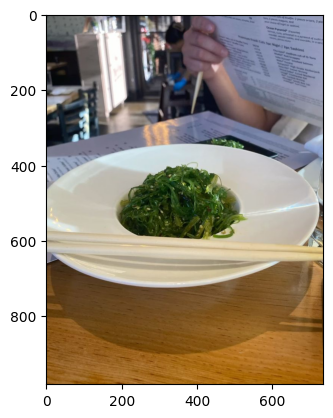

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
The prediction is:  seaweed_salad 

    baby_back_ribs  beef_tartare   churros  crab_cakes    donuts  \
0        0.002824      0.027163  0.001655    0.002146  0.000951   

   grilled_cheese_sandwich   lasagna  macaroni_and_cheese  seaweed_salad  \
0                  0.00124  0.003183             0.001481       0.958695   

   shrimp_and_grits  
0          0.000662  


In [ ]:
# Make prediction for the image you downloaded from internet

img = '/content/drive/My Drive/assg/seaweed_salad.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

The model was able to correctly predict seaweed salad with 95.87% confidence level.

## Shrimp and Grits

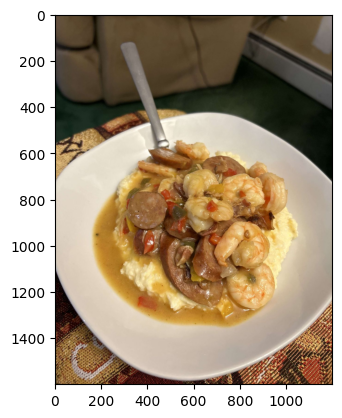

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
The prediction is:  shrimp_and_grits 

    baby_back_ribs  beef_tartare   churros  crab_cakes    donuts  \
0        0.000644      0.002279  0.000421    0.000331  0.000123   

   grilled_cheese_sandwich   lasagna  macaroni_and_cheese  seaweed_salad  \
0                 0.000041  0.000143             0.000129       0.000352   

   shrimp_and_grits  
0          0.995537  


In [ ]:
# Make prediction for the image you downloaded from internet

img = '/content/drive/My Drive/assg/shrimpngrits.jpg' # the picture you downloaded from internet, which contains a type of food in your food list
plt.imshow(plt.imread(img))
plt.show()

img_array = image_process(img)
prob_df, result = prediction(model, img_array, food_list)
print('The prediction is: ', result, '\n\n', prob_df)

The model was able to correctly predict shrimp and grits with 99.55% confidence level.

## Model Performance

The model was able to correctly predict the different images, with most of them having surprisingly high accuracy. For example, beef tartare had a 99.6% confidence and churros and donuts had a 99.9% confidence. Some complex and similar dishes like crab cakes and grilled cheese sandwich were correctly identified with confidence levels above 98%.

However there is one notable misclassification that occurred. It it when the model incorrectly predicted ‘grilled cheese sandiwch” as "churros". This error is likely to the similar colour and texture. It likely confused the model’s visual feature detectors. However, it was able to predict correctly with other images of grilled cheese sandwiches that I had tried with. This shows limitations of the model.

But the model is still rather reliable. Even with a low confidence of 40.5% for baby_back_ribs, it was still able to predict correctly. Hence it suggests that the model performs well but its certainty can vary based on image quality, lighting or composition.
The model was also able to handle different inputs like unusual angles or cluttered background reasonably well. The randomness reenacts real-life environments such as restaurants.

Overall, this model is performing well on “real-world” data with downloaded images. It is mostly reliable and accurate, well-suited for my problem and deployment.


# Summary

My final food classification model that I created showed a strong overall performance and results in recognizing the different food categories even when tested on real-life images. By leveraging transfer learning and modifying the top layers with dropout, L2 regularization and batch normalization, the model was able to balance learning capacity and generalization. It consistently predicted with high accuracy for the unseen images and correctly identifying dishes like donuts, beef tartare and seaweed salad with high confidence of almost more than 90%. The high confidence predictions reflect not just accuracy but also certainty. This is very valuable for user-facing applications for real-world deployment such as food logging or automated menu recognition for dietary restrictions.



Despite its strong performance, the model still had its weaknesses. The model showed signs of misclassification in a more ambiguous case. For example, the image of a grilled cheese being cooked in a pan was incorrectly classified as churros. It is probably due to its similar colour and texture, suggesting that the model may be relying more on superficial features like its shape and colour rather than deeper contextual understanding.


To try and further improve the model , there are a few methods. Firstly, we could try to enrich  and expand the training dataset with more diverse images like different backgrounds, lighting, angles or partially obscured food. This would help improve with generalization. Secondly, we could perform more aggressive and advanced augmentation such as brightness shirts, blur or shear transformation. Furthermore, fine-tuning more layers may allow it to capture subtle food-specific textures . Even though we had experimented with it earlier, it can be further explored with adjustments but I did not do so since I prioritized a more stable generalization and a better trade-off between accuracy and overfitting.

Overall, the model is highly functional and demonstrates strong potential for real-world usage. It performs well across a variety of food categories with high confidence in most predictions. But future adjustments and improvements could further enhance its accuracy and reliability in real-world scenarios. This would bring the model closer to real-world deployment in applications like restaurant automation systems.